## Principal Component Analysis and Data Reduction

In [1]:
import pandas
import numpy

### Import dataset

In [2]:
df = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
print(df.head())

   locationid     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0         101  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  NaN   
1         102  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  NaN   
2         103  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3         104  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  NaN   
4         105  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     tax  ptratio  lstat  medv date_appraised locationzone locationdistrict  \
0  296.0     15.3   4.98  24.0     2016-03-27           N3                N   
1  242.0     17.8   9.14  21.6     2016-03-28           B2                B   
2  242.0     17.8   4.03  34.7     2016-03-27           G3                G   
3  222.0     18.7   2.94  33.4     2016-03-26           D2                D   
4  222.0     18.7   5.33  36.2     2016-03-28           M3                M   

  areatype              areasubtype  
0    Rural  Rural 

### Viewing the unique areatype

In [3]:
df = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
print(df.groupby(['areatype','areasubtype']).size())

areatype  areasubtype               
Other     Other + high population       61
          Other + low population        63
          Other + med population        59
Rural     Rural + high population       59
          Rural + low population        69
          Rural + med population        42
Suburban  Suburban + high population    44
          Suburban + low population     49
          Suburban + med population     61
red       Rural + high population        1
dtype: int64


### Displaying the subset

In [5]:
data = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
data_numeric = data[['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv']]
print(data_numeric)

        crim    zn  chas    nox   age      dis    tax  ptratio  lstat   medv
0    0.00632  18.0   0.0  0.538  65.2   4.0900  296.0     15.3   4.98   24.0
1    0.02731   0.0   0.0  0.469  78.9   4.9671  242.0     17.8   9.14   21.6
2    0.02729   0.0   0.0  0.469  61.1   4.9671  242.0     17.8   4.03   34.7
3    0.03237   0.0   0.0  0.458  45.8   6.0622  222.0     18.7   2.94   33.4
4    0.06905   0.0   0.0  0.458  54.2   6.0622  222.0     18.7   5.33   36.2
..       ...   ...   ...    ...   ...      ...    ...      ...    ...    ...
503  0.04527   0.0   0.0  0.573  76.7   2.2875  273.0     21.0   9.08   20.6
504  0.06076   0.0   0.0  0.573  91.0   2.1675  273.0     21.0   5.64   23.9
505  0.10959   0.0   0.0  0.573  89.3   2.3889  273.0     21.0   6.48   22.0
506  0.04741   0.0   0.0  0.573  80.8   2.5050  273.0     21.0   7.88   11.9
507  0.50000  90.0   1.0  0.310   4.3  10.6000  511.0     19.0   1.62  120.0

[508 rows x 10 columns]


### Displaying PCA names

In [8]:
data = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ]
pcs_names = []
for i, col in enumerate(data_numeric.columns):
    pcs_names.append('PC' + str(i+1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


### Normalizing dataset

In [9]:
data = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ] 
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
print(data_normed)

         crim        zn      chas       nox       age       dis       tax  \
0   -0.418536  0.267055 -0.275900 -0.137020 -0.112808  0.130150 -0.667434   
1   -0.416092 -0.490961 -0.275900 -0.730204  0.371820  0.542721 -0.988314   
2   -0.416094 -0.490961 -0.275900 -0.730204 -0.257842  0.542721 -0.988314   
3   -0.415503 -0.490961 -0.275900 -0.824769 -0.799069  1.057835 -1.107158   
4   -0.411231 -0.490961 -0.275900 -0.824769 -0.501925  1.057835 -1.107158   
..        ...       ...       ...       ...       ...       ...       ...   
503 -0.414000 -0.490961 -0.275900  0.163870  0.293997 -0.717712 -0.804105   
504 -0.412197 -0.490961 -0.275900  0.163870  0.799849 -0.774158 -0.804105   
505 -0.406510 -0.490961 -0.275900  0.163870  0.739713 -0.670015 -0.804105   
506 -0.413751 -0.490961 -0.275900  0.163870  0.439031 -0.615404 -0.804105   
507 -0.361046  3.299120  3.617361 -2.097106 -2.267103  3.192329  0.610141   

      ptratio     lstat      medv  
0   -1.453108 -1.069057  0.125384  
1  

### Specifying number of components

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
data = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ] 
pcs_names = [] 
for i, col in enumerate(data_numeric.columns): 
    pcs_names.append('PC' + str(i+1)) 
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
pca = PCA(n_components=data_normed.shape[1])
pca.fit(data_normed)
data_pca = pandas.DataFrame(pca.transform(data_normed),columns = pcs_names)
print(data_pca)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.342778  0.625148 -0.228217 -1.088349 -0.095184  0.207490 -0.406953   
1    0.860614 -0.015591 -1.025897 -0.100099 -0.159443  0.583202  0.326937   
2    1.744538  0.470895 -0.754337 -0.031384  0.929946  0.554919  0.158325   
3    2.133251 -0.045128 -0.766529  0.426034  0.953271  0.605802 -0.108642   
4    1.982165  0.090526 -0.750016  0.358022  0.917901  0.552417  0.281084   
..        ...       ...       ...       ...       ...       ...       ...   
503 -0.360778 -0.029167 -1.261804  0.509548  0.606127  0.071783  0.274625   
504 -0.296938  0.332337 -1.285106  0.439513  1.020379  0.004148  0.570568   
505 -0.336883  0.184288 -1.289388  0.465626  0.838324  0.021825  0.502392   
506 -0.573526 -0.353158 -1.406928  0.547163  0.200686  0.120882  0.017433   
507  7.190762  3.458461  4.879250  3.003465  3.534699 -1.798387  2.787047   

          PC8       PC9      PC10  
0   -0.604387 -0.123641 -0.240634  
1  

### Creating a scree plot

Text(0.5, 0, 'Principal component')

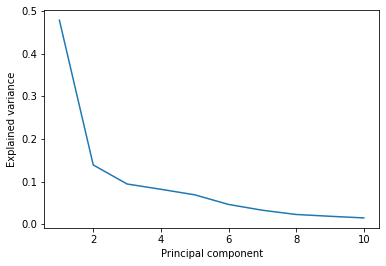

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
data = pandas.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv',dtype={'locationid':numpy.int64})
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ]  
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
pca = PCA(n_components=data_normed.shape[1]) 
pca.fit(data_normed) 
sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,11))
plt.ylabel('Explained variance')
plt.xlabel('Principal component')

### Selecting the fewest components

In [20]:
import pandas as pd
import numpy as np
ata = pd.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv') 
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ] 
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std() 
pca = PCA(n_components=data_normed.shape[1]) 
pca.fit(data_normed) 
pcs_names = [] 
for i, col in enumerate(data_numeric.columns): 
    pcs_names.append('PC' + str(i+1))
for pc, var in zip(pcs_names,np.cumsum(pca.explained_variance_ratio_)):
   print(pc,var)

PC1 0.47859499990792465
PC2 0.6178139657282264
PC3 0.7123156607559384
PC4 0.7944517552060582
PC5 0.8636122674875764
PC6 0.9102063617591393
PC7 0.9432057269953477
PC8 0.9662321226682103
PC9 0.9850413688099852
PC10 1.0000000000000002


### Creating a rotation

In [21]:
data = pd.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv') 
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ] 
pcs_names = [] 
for i, col in enumerate(data_numeric.columns): 
    pcs_names.append('PC' + str(i+1)) 
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
pca = PCA(n_components=data_normed.shape[1]) 
pca.fit(data_normed) 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = data_numeric.columns)
print(rotation)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
crim    -0.275660 -0.180277  0.600904 -0.065864  0.191533  0.678388  0.080232   
zn       0.313547 -0.173838  0.538305 -0.166851 -0.206307 -0.416629  0.327633   
chas     0.014977  0.579499  0.301014  0.652130 -0.363617  0.068979 -0.072793   
nox     -0.385361  0.244955  0.082498 -0.226532 -0.031160 -0.280331 -0.313613   
age     -0.372528  0.257991 -0.121289 -0.139030 -0.043113 -0.102953  0.645921   
dis      0.369255 -0.337503  0.125627  0.153940 -0.235842 -0.054838  0.005605   
tax     -0.349469 -0.100598  0.415262  0.055219  0.253254 -0.481973 -0.294242   
ptratio -0.236301 -0.392582 -0.150720  0.664409  0.334891 -0.175007  0.255033   
lstat   -0.365372 -0.162028  0.016968 -0.045967 -0.514008 -0.011884  0.300823   
medv     0.300637  0.412914  0.160583 -0.040038  0.538136 -0.078698  0.351009   

              PC8       PC9      PC10  
crim    -0.108636  0.004946  0.104546  
zn      -0.212408  0.422353 

### Creating components

In [23]:
data = pd.read_csv('/Users/Richard/Documents/MSDA/Databases/Boston_housing_data_wrong_areatype_w_subtype.csv') 
data_numeric = data[ ['crim','zn','chas','nox','age','dis','tax','ptratio','lstat','medv'] ] 
pcs_names = [] 
for i, col in enumerate(data_numeric.columns): 
    pcs_names.append('PC' + str(i+1)) 
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
pca = PCA(n_components=data_normed.shape[1]) 
pca.fit(data_normed) 
data_pca = pd.DataFrame(pca.transform(data_normed),columns = pcs_names) 
data_reduced = data_pca.iloc[:,0:6]
print(data_reduced)

          PC1       PC2       PC3       PC4       PC5       PC6
0    1.342778  0.625148 -0.228217 -1.088349 -0.095184  0.207490
1    0.860614 -0.015591 -1.025897 -0.100099 -0.159443  0.583202
2    1.744538  0.470895 -0.754337 -0.031384  0.929946  0.554919
3    2.133251 -0.045128 -0.766529  0.426034  0.953271  0.605802
4    1.982165  0.090526 -0.750016  0.358022  0.917901  0.552417
..        ...       ...       ...       ...       ...       ...
503 -0.360778 -0.029167 -1.261804  0.509548  0.606127  0.071783
504 -0.296938  0.332337 -1.285106  0.439513  1.020379  0.004148
505 -0.336883  0.184288 -1.289388  0.465626  0.838324  0.021825
506 -0.573526 -0.353158 -1.406928  0.547163  0.200686  0.120882
507  7.190762  3.458461  4.879250  3.003465  3.534699 -1.798387

[508 rows x 6 columns]
